<a href="https://colab.research.google.com/github/Cinnameldehyde/Car-Rental-system/blob/main/Copy_of_Skin_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 36 percent accuracy DERMNET 23 CLASSES NOT COMBINED

Downloading the dataset

In [ ]:
!kaggle datasets download -d shubhamgoel27/dermnet

Dataset URL: https://www.kaggle.com/datasets/shubhamgoel27/dermnet
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
100% 1.72G/1.72G [01:31<00:00, 21.4MB/s]
100% 1.72G/1.72G [01:31<00:00, 20.2MB/s]


In [ ]:
from zipfile import ZipFile

with ZipFile("dermnet.zip", "r") as zip_ref:
  zip_ref.extractall()

Checking no of images

In [ ]:
import os
train_dir  ="/content/train"
total_train_images  =0

for category in os.listdir(train_dir):
    category_dir = os.path.join(train_dir, category)
    num_images = len(os.listdir(category_dir))
    total_train_images += num_images

print("Total no of training images: ", total_train_images)

Total no of training images:  15557


In [ ]:
test_dir = "/content/test"
total_test_images  =0

for category in os.listdir(test_dir):
  category_dir = os.path.join(test_dir , category)
  num_images = len(os.listdir(category_dir))
  total_test_images += num_images

print("Total no of test images: ", total_test_images)

Total no of test images:  4002


Seeing some sample images

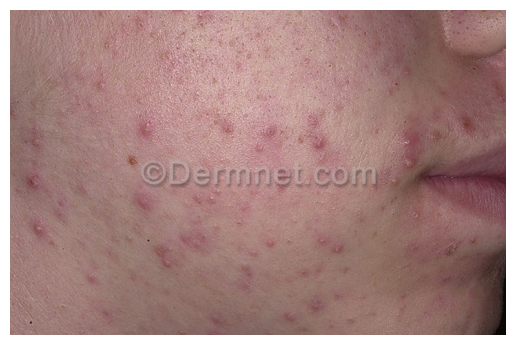

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_dir = "/content/train/Acne and Rosacea Photos/07Acne081101.jpg"
img = mpimg.imread(img_dir)
plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
print(img.shape)

(472, 720, 3)


Using Data Generators  - Helping in Data Augmentation

In [ ]:
#DEFINING THE DATA GENERATOR
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_gen = ImageDataGenerator(
    rescale = 1./255,
)

In [ ]:
#Defining the training set data generator

train_dir  ="/content/train"

train_generator = data_gen.flow_from_directory(
    train_dir,
    target_size =(150, 150),
    class_mode="categorical",
    batch_size = 32
)

Found 15557 images belonging to 23 classes.


In [ ]:
#Defining the test set generator

test_dir = "/content/test"

test_generator = data_gen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    class_mode="categorical",
    batch_size = 32
)

Found 4002 images belonging to 23 classes.


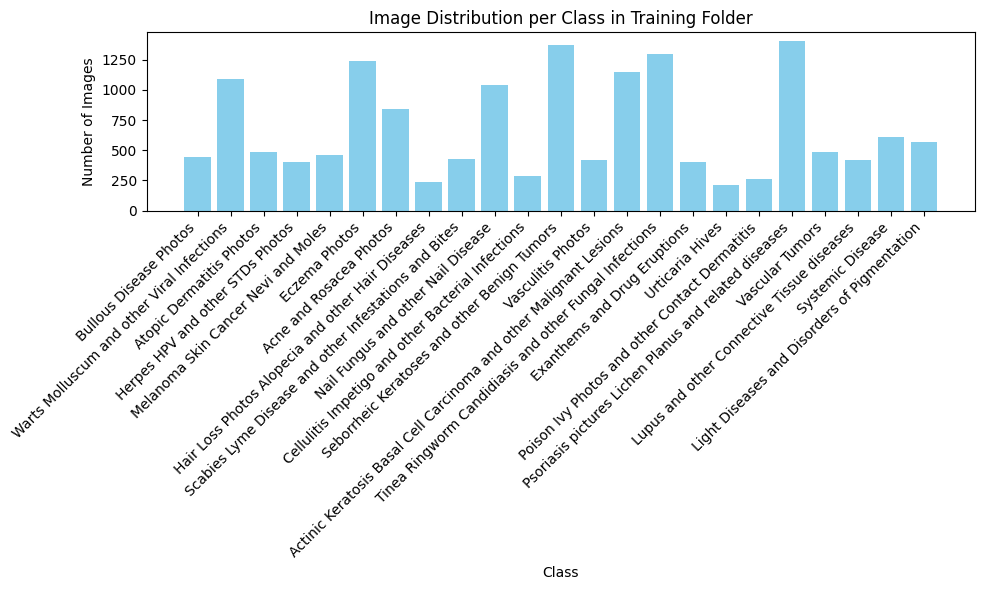

In [ ]:
import os
import matplotlib.pyplot as plt

# Define the path to the training folder
train_folder = '/content/train'

# Dictionary to hold the class names and their image counts
class_counts = {}

# Loop through each subfolder (class) in the training folder
for class_name in os.listdir(train_folder):
    class_path = os.path.join(train_folder, class_name)
    if os.path.isdir(class_path):  # Check if it's a folder
        # Count the number of images in each class folder
        num_images = len(os.listdir(class_path))
        class_counts[class_name] = num_images

# Plotting the class distribution
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Image Distribution per Class in Training Folder')
plt.tight_layout()
plt.show()


Building the CNN

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(32, (3,3), activation="relu", input_shape=(150, 150, 3), padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(256, (3,3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(GlobalAveragePooling2D())

model.add(Dense(256, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(23, activation="softmax"))

# Compile model with learning rate adjustment


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
optimizer = Adam(learning_rate=0.0001)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Train the model with increased batch size
history = model.fit(train_generator, epochs=25, batch_size=128, validation_data=test_generator)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


487/487 ━━━━━━━━━━━━━━━━━━━━ 104s 184ms/step - accuracy: 0.1045 - loss: 3.1252 - val_accuracy: 0.1214 - val_loss: 2.9261
Epoch 2/25
487/487 ━━━━━━━━━━━━━━━━━━━━ 85s 172ms/step - accuracy: 0.1611 - loss: 2.8694 - val_accuracy: 0.1822 - val_loss: 2.7584
Epoch 3/25
487/487 ━━━━━━━━━━━━━━━━━━━━ 77s 158ms/step - accuracy: 0.1815 - loss: 2.7869 - val_accuracy: 0.2076 - val_loss: 2.6985
Epoch 4/25
487/487 ━━━━━━━━━━━━━━━━━━━━ 88s 169ms/step - accuracy: 0.1922 - loss: 2.7441 - val_accuracy: 0.1899 - val_loss: 2.7167
Epoch 5/25
487/487 ━━━━━━━━━━━━━━━━━━━━ 77s 157ms/step - accuracy: 0.2065 - loss: 2.7019 - val_accuracy: 0.2144 - val_loss: 2.6536
Epoch 6/25
487/487 ━━━━━━━━━━━━━━━━━━━━ 87s 168ms/step - accuracy: 0.2169 - loss: 2.6555 - val_accuracy: 0.2369 - val_loss: 2.6370
Epoch 7/25
487/487 ━━━━━━━━━━━━━━━━━━━━ 85s 173ms/step - accuracy: 0.2210 - loss: 2.6307 - val_accuracy: 0.2326 - val_loss: 2.6127
Epoch 8/25
487/487 ━━━━━━━━━━━━━━━━━━━━ 146s 181ms/step - accuracy: 0.2319 - loss: 2.6052 - v

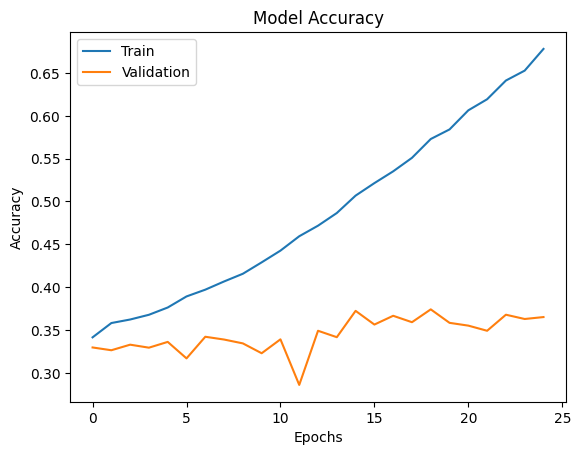

In [ ]:
h = history

plt.plot(h.history["accuracy"])
plt.plot(h.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()

In [ ]:
model.save("skin_disease_model.h5")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import random

# Define your class names from the subfolder names
class_names = sorted(os.listdir('/content/train'))  # Adjust the path

# Function to load and preprocess an image
def prepare_input_data(image_path, target_size=(150, 150)):
    try:
        image = load_img(image_path, target_size=target_size)
        image_array = img_to_array(image)
        image_array = np.expand_dims(image_array, axis=0)
        image_array = image_array / 255.0  # Normalize to [0, 1]
        return image_array
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return None

# Predict function that will be used for inference
def get_predictions(model, image_paths):
    y_true = []
    y_pred = []

    for image_path in image_paths:
        # Prepare the image
        image_data = prepare_input_data(image_path)
        if image_data is None:
            continue  # Skip the image if there was an error

        # Get the true class from folder structure
        true_class = image_path.split('/')[-2]  # Assuming folder structure is: base_path/class/image.jpg
        true_class = class_names.index(true_class)

        # Predict the class
        pred_class = np.argmax(model.predict(image_data), axis=-1)[0]

        # Store the true and predicted class
        y_true.append(true_class)
        y_pred.append(pred_class)

    return np.array(y_true), np.array(y_pred)

# Load your trained model
model_path = '/content/skin_disease_model.h5'  # Adjust the model path
model = load_model(model_path, compile=False)  # Load without compiling to avoid the warning

# Define the directory with test images
test_dir = '/content/test'  # Adjust the path

# Collect image paths from test set (can be adjusted based on your test folder structure)
image_paths = []
for root, dirs, files in os.walk(test_dir):
    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff')):
            image_paths.append(os.path.join(root, file))

# Ensure there are images in the test set
if not image_paths:
    print("No test images found. Please check the test set directory.")
else:
    print(f"Found {len(image_paths)} test images.")

# Get predictions and true labels
y_true, y_pred = get_predictions(model, image_paths)

# Ensure we have predictions and true labels
if len(y_true) == 0 or len(y_pred) == 0:
    print("No valid predictions were made. Please check the image processing.")
else:
    # Calculate metrics
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)  # 'micro', 'macro', 'weighted'
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=1)
    accuracy = accuracy_score(y_true, y_pred)

    # Create a DataFrame to display the results in a beautiful table
    metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
        'Score': [accuracy, precision, recall, f1]
    })

    # Display the results
    print(metrics_df.to_string(index=False))


Found 4002 test images.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 